Importowanie bibliotek

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

Ładowanie zestawu danych

In [158]:
dataset = pd.read_csv('wine.csv')
dataset.shape

(178, 14)

1. Eksploracja danych strukturalnych

In [159]:
dataset.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [160]:
dataset.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


2. Dzielenie danych na zestaw treningowy i testowy

In [161]:
X = dataset.iloc[:, 0:13].values  # feature metric
Y = dataset.iloc[:, 13].values  # dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

3. Feature scaling - skalowanie cech to metoda używana do normalizacji zakresu zmiennych niezależnych lub cech danych

In [162]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

4. Fitting the feature metric data into LDA model (liniowa analiza dyskryminacyjna)

In [163]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit(X_train, Y_train).transform(X_train)
X_test = lda.fit(X_test, Y_test).transform(X_test)

5. Explain the variance (proporcja w jakiej model uwzględnia zmienność danego zbioru danych)

In [164]:
explained_variance = lda.explained_variance_ratio_
explained_variance

array([0.62801209, 0.37198791])

6. Dopasowanie modelu regresji logistycznej

In [165]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

7. Predykcja dla zbioru testowego

In [166]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

8. Ocena modelu przy użyciu macierzy pomyłek i accuracy dla zbioru testowego

In [167]:
confusion_matriks = confusion_matrix(Y_test, Y_pred)
confusion_matriks

array([[19,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 13]], dtype=int64)

In [168]:
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

1.0

9. Predykcja dla zbioru treningowego

In [169]:
Y_pred = classifier.predict(X_train)
Y_pred

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3,
       1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3], dtype=int64)

10. Ocena modelu przy użyciu macierzy pomyłek i accuracy dla zbioru treningowego

In [170]:
confusion_matriks = confusion_matrix(Y_train, Y_pred)
confusion_matriks

array([[40,  0,  0],
       [ 0, 49,  0],
       [ 0,  0, 35]], dtype=int64)

In [171]:
accuracy = accuracy_score(Y_train, Y_pred)
accuracy

1.0

11. Wizualizacja wyników zbioru testowego

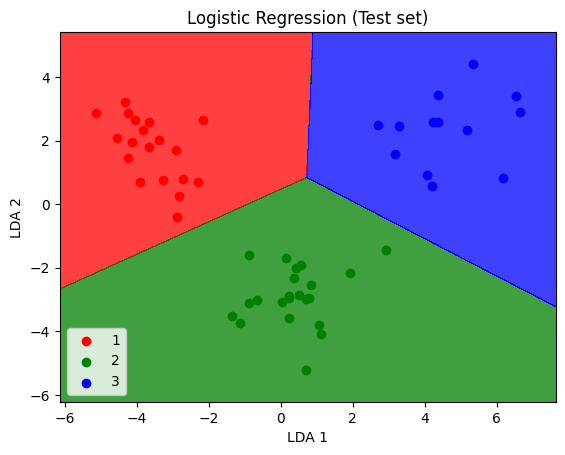

In [172]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()

12. Wizualizacja wyników zbioru treningowego

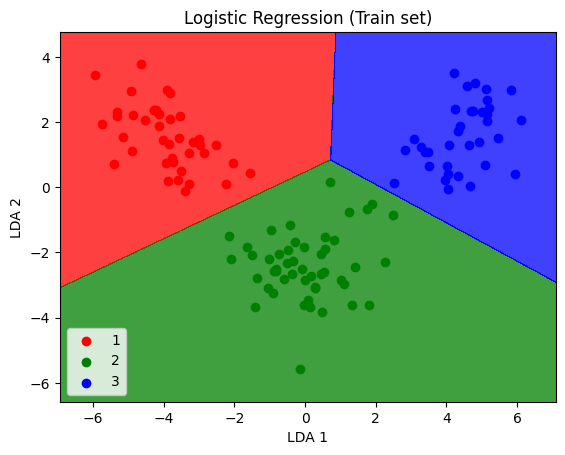

In [173]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()

Accuracy zbiorów testowych:
PCA 0.8611111111111112 < 1.0 LDA
Accuracy zbiorów treningowych:
PCA 0.9295774647887324 < 1.0 LDA

Dla tego zestawu danych lepszym algorytmem jest LDA, widać to i po wyższym accuracy i patrząc na wykresy wizualizacji wyników. 